### Investigate World Development Indicators Dataset from World Bank
> #### I will explore Economy, ealth and Economy indicators for The Republic of Singapore
> ##### Motivation:
I am inspired by the story of singapore as after independence it was an undeveloped country, Now singapore one of the world fastest growing economies and it has been developed in many sectors Economy, Health, and Employment


> ##### I will study the progress of singapore over time in specific Sectors

><li> The Economic Development over years 
><li> The Health Development over years
><li> Unemployment over year
><li> Compare singapore development among its region countries </li>



In [1]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
!ls

Adobe Illustrator 2022.lnk
Data Science Diploma
Data Visualization
Docker Desktop.lnk
Excel Training
Fundamental of statistics
Investigate WDI Dataset (Singapore Development Indicators).ipynb
Notion.lnk
PyCharm Community Edition 2022.1.lnk
Snipping Tool.lnk
Visual Studio Code.lnk
bike share project Github
database.sqlite
desktop.ini
~$Ø·Ù„Ø¨.docx


In [3]:
# connect our database
db = sqlite3.connect("database.sqlite")
cur = db.cursor()

In [4]:
# Acces our database
# present the database schema/tables by access sqlite_master

tables_query =  """
                SELECT name
                FROM sqlite_master
                WHERE type = 'table';
                """


tables = cur.execute(tables_query)

print(tables.fetchall())

[('Country',), ('CountryNotes',), ('Series',), ('Indicators',), ('SeriesNotes',), ('Footnotes',)]


###### Explore tables data

In [5]:
country_table_query =   """
                        SELECT *
                        FROM Country
                        LIMIT 10;
                        """

countries = pd.read_sql(country_table_query, db)

countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   CountryCode                                 10 non-null     object
 1   ShortName                                   10 non-null     object
 2   TableName                                   10 non-null     object
 3   LongName                                    10 non-null     object
 4   Alpha2Code                                  10 non-null     object
 5   CurrencyUnit                                10 non-null     object
 6   SpecialNotes                                10 non-null     object
 7   Region                                      10 non-null     object
 8   IncomeGroup                                 10 non-null     object
 9   Wb2Code                                     10 non-null     object
 10  NationalAccountsBaseYear     

In [6]:
country_notes_query = """
                        SELECT *
                        FROM CountryNotes
                        LIMIT 10;
                        """

countries_notes = pd.read_sql(country_notes_query, db)

countries_notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Countrycode  10 non-null     object
 1   Seriescode   10 non-null     object
 2   Description  10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


In [7]:
series_query = """
                SELECT * 
                FROM Series
                LIMIT 10;
                """

series = pd.read_sql(series_query, db)

series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   SeriesCode                        10 non-null     object
 1   Topic                             10 non-null     object
 2   IndicatorName                     10 non-null     object
 3   ShortDefinition                   10 non-null     object
 4   LongDefinition                    10 non-null     object
 5   UnitOfMeasure                     10 non-null     object
 6   Periodicity                       10 non-null     object
 7   BasePeriod                        10 non-null     object
 8   OtherNotes                        10 non-null     object
 9   AggregationMethod                 10 non-null     object
 10  LimitationsAndExceptions          10 non-null     object
 11  NotesFromOriginalSource           10 non-null     object
 12  GeneralComments          

In [8]:
indicator_query = """
                    SELECT *
                    FROM Indicators
                    LIMIT 10;
                    """

indicators = pd.read_sql(indicator_query, db)

indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CountryName    10 non-null     object 
 1   CountryCode    10 non-null     object 
 2   IndicatorName  10 non-null     object 
 3   IndicatorCode  10 non-null     object 
 4   Year           10 non-null     int64  
 5   Value          10 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 608.0+ bytes


Exploring the Country, Country Notes, Series and Indicators

<li> Country tables represent data about each country </li>
<li> Series tables represent each indicator information </li>
<li> indicators table represent indicators data for each country </li>
<li> Indicators table joins Country table on Country Code and joins  Series Table on indicator Code</li>

###### Now i will get the data related to singapore and its region region

In [9]:
singapore_query = """
                    SELECT *
                    FROM Country
                    WHERE ShortName == "Singapore";
                    """

singapore_country = pd.read_sql(singapore_query, db)

singapore_country

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,SGP,Singapore,Singapore,Republic of Singapore,SG,Singapore dollar,Fiscal year end: March 31; reporting period fo...,East Asia & Pacific,High income: nonOECD,SG,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"National Health Survey (NHS), 2010",,Yes,,2011,2013,1975


In [10]:
# Get all singapore related indicators data
singapore_indicators_query = """
                                SELECT *
                                FROM Indicators
                                WHERE CountryCode = "SGP";
                                """

singapore_indicators = pd.read_sql(singapore_indicators_query,db)

singapore_indicators.info ()         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22600 entries, 0 to 22599
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CountryName    22600 non-null  object 
 1   CountryCode    22600 non-null  object 
 2   IndicatorName  22600 non-null  object 
 3   IndicatorCode  22600 non-null  object 
 4   Year           22600 non-null  int64  
 5   Value          22600 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.0+ MB


In [11]:
# Get all singapore related indicators data
singapore_indicators = indicators[indicators["CountryCode"] == "SGP"]

singapore_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CountryName    0 non-null      object 
 1   CountryCode    0 non-null      object 
 2   IndicatorName  0 non-null      object 
 3   IndicatorCode  0 non-null      object 
 4   Year           0 non-null      int64  
 5   Value          0 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 0.0+ bytes


In [12]:
# Get region data
region_query = """
                SELECT *
                FROM Country
                WHERE Region = "East Asia & Pacific";
                """

region_data = pd.read_sql(region_query, db)

region_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   CountryCode                                 36 non-null     object
 1   ShortName                                   36 non-null     object
 2   TableName                                   36 non-null     object
 3   LongName                                    36 non-null     object
 4   Alpha2Code                                  36 non-null     object
 5   CurrencyUnit                                36 non-null     object
 6   SpecialNotes                                36 non-null     object
 7   Region                                      36 non-null     object
 8   IncomeGroup                                 36 non-null     object
 9   Wb2Code                                     36 non-null     object
 10  NationalAccountsBaseYear    

In [13]:
# Get all rigion country indicators 
region_indicators_query = """
                            SELECT I.CountryName, I.CountryCode, IndicatorName, IndicatorCode, Year, Value 
                            FROM Indicators AS I
                            INNER JOIN Country AS C
                            ON I.CountryCode = C.CountryCode
                            WHERE Region = "East Asia & Pacific";
                            """

region_indicators = pd.read_sql(region_indicators_query, db)

region_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703768 entries, 0 to 703767
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CountryName    703768 non-null  object 
 1   CountryCode    703768 non-null  object 
 2   IndicatorName  703768 non-null  object 
 3   IndicatorCode  703768 non-null  object 
 4   Year           703768 non-null  int64  
 5   Value          703768 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 32.2+ MB


In [14]:
# Check the number of unique countries name to make sure we get all the countries in the region
region_indicators.CountryName.nunique()

36

Now we have all Singapore Indicators Data, and East Asia & Pacific Region countries Indicators Data

###### Getting the Indicators [Economy, Health, Employment]

In [15]:
topics_query = """
                SELECT DISTINCT Topic
                FROM Series;
                """

topics = pd.read_sql(topics_query, db)

topics_list = [x for x in topics["Topic"]]

topics_list

['Economic Policy & Debt: Balance of payments: Capital & financial account',
 'Economic Policy & Debt: Balance of payments: Current account: Balances',
 'Economic Policy & Debt: Balance of payments: Current account: Goods, services & income',
 'Economic Policy & Debt: Balance of payments: Current account: Transfers',
 'Economic Policy & Debt: Balance of payments: Reserves & other items',
 'Economic Policy & Debt: External debt: Amortization',
 'Economic Policy & Debt: External debt: Arrears, reschedulings, etc.',
 'Economic Policy & Debt: External debt: Commitments',
 'Economic Policy & Debt: External debt: Currency composition',
 'Economic Policy & Debt: External debt: Debt outstanding',
 'Economic Policy & Debt: External debt: Debt ratios & other items',
 'Economic Policy & Debt: External debt: Debt service',
 'Economic Policy & Debt: External debt: Disbursements',
 'Economic Policy & Debt: External debt: Interest',
 'Economic Policy & Debt: External debt: Net flows',
 'Economic Poli

### Indicators Choice 

> I will select one indicator related to each topic and see the progress in it over time in singapore and compare singapore with its region countries to see singapore development progress. 

><li>Economy Indicator : GDP Per Capita
><li>Health : Life Expectancy
><li>Unemployment : Total Unemployment Rate

In [16]:
# Economy Indicators
economy_ind_query = """
                    SELECT DISTINCT I.IndicatorName
                    FROM Indicators AS I
                    INNER JOIN Series AS S
                    ON I.IndicatorName = S.IndicatorName
                    WHERE Topic LIKE "Economic Policy & Debt: National accounts: Growth rates"
                    AND CountryCode = "SGP";
                    """

economy_ind = pd.read_sql(economy_ind_query, db)

economy_ind_list = [x for x in economy_ind["IndicatorName"]]

economy_ind_list

['Agriculture, value added (annual % growth)',
 'Exports of goods and services (annual % growth)',
 'Final consumption expenditure, etc. (annual % growth)',
 'GDP growth (annual %)',
 'GDP per capita growth (annual %)',
 'General government final consumption expenditure (annual % growth)',
 'Gross capital formation (annual % growth)',
 'Gross fixed capital formation (annual % growth)',
 'Household final consumption expenditure (annual % growth)',
 'Household final consumption expenditure per capita growth (annual %)',
 'Household final consumption expenditure, etc. (annual % growth)',
 'Imports of goods and services (annual % growth)',
 'Industry, value added (annual % growth)',
 'Manufacturing, value added (annual % growth)',
 'Services, etc., value added (annual % growth)']

In [17]:
# Health indicators
health_ind_query = """
                SELECT DISTINCT I.IndicatorName
                FROM Indicators AS I
                INNER JOIN Series AS S
                ON I.IndicatorName = S.IndicatorName
                WHERE Topic LIKE "%Health%"
                AND CountryCode = "SGP";
                """

health_ind = pd.read_sql(health_ind_query, db)

health_ind_list = [x for x in health_ind["IndicatorName"]]

health_ind_list

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Birth rate, crude (per 1,000 people)',
 'Births attended by skilled health staff (% of total)',
 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
 'Cause of death, by injury (% of total)',
 'Cause of death, by non-communicable diseases (% of total)',
 'Completeness of death registration with cause-of-death information (%)',
 'Completeness of infant death reporting (% of reported infant deaths to estimated infant deaths)',
 'Completeness of total death reporting (% of reported total deaths to estimated total deaths)',
 'Contraceptive prevalence (% of women ages 15-49)',
 'Death rate, crude (per 1,000 people)',
 'Diabetes prevalence (% of population ages 20 to 79)',
 'External resources for h

In [18]:
# Unemployment Indicators
unemployment_ind_query = """
                        SELECT DISTINCT I.IndicatorName
                        FROM Indicators AS I
                        INNER JOIN Series AS S
                        ON I.IndicatorName = S.IndicatorName
                        WHERE Topic LIKE "%Unemployment"
                        AND CountryCode = "SGP";
                        """

unemployment_ind = pd.read_sql(unemployment_ind_query, db)

unemployment_ind_list = [x for x in unemployment_ind["IndicatorName"]]

unemployment_ind_list

['Long-term unemployment (% of total unemployment)',
 'Unemployment with primary education (% of total unemployment)',
 'Unemployment with primary education, female (% of female unemployment)',
 'Unemployment with primary education, male (% of male unemployment)',
 'Unemployment with secondary education (% of total unemployment)',
 'Unemployment with secondary education, female (% of female unemployment)',
 'Unemployment with secondary education, male (% of male unemployment)',
 'Unemployment with tertiary education (% of total unemployment)',
 'Unemployment with tertiary education, female (% of female unemployment)',
 'Unemployment with tertiary education, male (% of male unemployment)',
 'Unemployment, female (% of female labor force) (national estimate)',
 'Unemployment, male (% of male labor force) (national estimate)',
 'Unemployment, total (% of total labor force) (national estimate)',
 'Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)',
 'Un

##### Get each indivdual indicator data for the region

I will get all the region data for analysis and make mask to filter through analysis

In [19]:
# GDP per Gapita Growth Annualy Indicator
gdp_query = """
            SELECT I.CountryName, I.CountryCode, I.IndicatorName, Year, Value
            FROM Indicators AS I
            INNER JOIN Country AS C
            ON C.CountryCode = I.CountryCode
            WHERE Region = "East Asia & Pacific"
            AND IndicatorName = "GDP per capita growth (annual %)"
            """

gdp = pd.read_sql(gdp_query, db)

gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CountryName    1272 non-null   object 
 1   CountryCode    1272 non-null   object 
 2   IndicatorName  1272 non-null   object 
 3   Year           1272 non-null   int64  
 4   Value          1272 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 49.8+ KB


In [20]:
# Health : Life Expectancy Indicator
health_query = """
            SELECT I.CountryName, I.CountryCode, I.IndicatorName, Year, Value
            FROM Indicators AS I
            INNER JOIN Country AS C
            ON C.CountryCode = I.CountryCode
            WHERE Region = "East Asia & Pacific"
            AND IndicatorName = "Life expectancy at birth, total (years)"
            """

health = pd.read_sql(health_query, db)

health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CountryName    1681 non-null   object 
 1   CountryCode    1681 non-null   object 
 2   IndicatorName  1681 non-null   object 
 3   Year           1681 non-null   int64  
 4   Value          1681 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 65.8+ KB


In [21]:
# Unemployment Rates Indicator
unemployment_query = """
            SELECT I.CountryName, I.CountryCode, I.IndicatorName, Year, Value
            FROM Indicators AS I
            INNER JOIN Country AS C
            ON C.CountryCode = I.CountryCode
            WHERE Region = "East Asia & Pacific"
            AND IndicatorName = "Unemployment, total (% of total labor force) (national estimate)"
            """

unemployment = pd.read_sql(unemployment_query, db)

unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CountryName    531 non-null    object 
 1   CountryCode    531 non-null    object 
 2   IndicatorName  531 non-null    object 
 3   Year           531 non-null    int64  
 4   Value          531 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 20.9+ KB


### Data Wrangling

Now I have my Dfs for the selected three indicators for all the region country, Next i will clean my data, analyize Singapore progress over year and compare its progress to its region neughbours

In [22]:
# GDP wrangling
gdp.head()

,CountryName,CountryCode,IndicatorName,Year,Value
0,Australia,AUS,GDP per capita growth (annual %),1961,0.457076
1,Australia,AUS,GDP per capita growth (annual %),1962,-1.115531
2,Australia,AUS,GDP per capita growth (annual %),1963,4.194893
3,Australia,AUS,GDP per capita growth (annual %),1964,4.897367
4,Australia,AUS,GDP per capita growth (annual %),1965,3.923330


In [23]:
gdp.dtypes

CountryName       object
CountryCode       object
IndicatorName     object
Year               int64
Value            float64
dtype: object

In [24]:
gdp.shape

(1272, 5)

In [25]:
gdp.describe()

,Year,Value
count,1272.000000,1272.000000
mean,1991.669025,2.832019
std,14.403745,5.414118
min,1961.000000,-45.222114
25%,1981.000000,0.225935
50%,1993.000000,3.023345
75%,2004.000000,5.696792
max,2014.000000,43.226695


In [26]:
# life Expectancy Wrangling
health.head()

,CountryName,CountryCode,IndicatorName,Year,Value
0,Australia,AUS,"Life expectancy at birth, total (years)",1960,70.817073
1,Australia,AUS,"Life expectancy at birth, total (years)",1961,70.973171
2,Australia,AUS,"Life expectancy at birth, total (years)",1962,70.942439
3,Australia,AUS,"Life expectancy at birth, total (years)",1963,70.911707
4,Australia,AUS,"Life expectancy at birth, total (years)",1964,70.880976


In [27]:
health.dtypes

CountryName       object
CountryCode       object
IndicatorName     object
Year               int64
Value            float64
dtype: object

In [28]:
health.describe()

,Year,Value
count,1681.000000,1681.000000
mean,1986.541939,65.006619
std,15.575991,9.983934
min,1960.000000,19.265512
25%,1973.000000,59.381220
50%,1987.000000,66.330098
75%,2000.000000,71.822366
max,2013.000000,83.831707


In [29]:
# Unemployemnt wrangling
unemployment.head()

,CountryName,CountryCode,IndicatorName,Year,Value
0,American Samoa,ASM,"Unemployment, total (% of total labor force) (...",1980,12.4
1,American Samoa,ASM,"Unemployment, total (% of total labor force) (...",1981,10.6
2,American Samoa,ASM,"Unemployment, total (% of total labor force) (...",1982,12.8
3,American Samoa,ASM,"Unemployment, total (% of total labor force) (...",1983,13.0
4,American Samoa,ASM,"Unemployment, total (% of total labor force) (...",1984,13.1


In [30]:
unemployment.dtypes

CountryName       object
CountryCode       object
IndicatorName     object
Year               int64
Value            float64
dtype: object

In [31]:
unemployment.describe()

,Year,Value
count,531.000000,531.000000
mean,1998.222222,5.275330
std,9.887841,3.650972
min,1980.000000,0.100000
25%,1990.000000,2.900000
50%,1999.000000,4.300000
75%,2007.000000,6.950000
max,2014.000000,31.900000


##### Notes

<li>In the health and GDP Dfs it has very neay start and end year range with only 1 year difference (1960/1961 --> 2013/2014_
<li>In unemployment Dfs it has data starts from 1980 only which mean 

### Explotery Data Analysis For Singapore


I will analyize singapore indicators data the goal is to answer the following Question:


## Q: How singapore development progess over the years ?

In [32]:
# First i will get singapore data only
singapore_gdp = gdp[gdp["CountryCode"] == "SGP"]
singapore_health = health[health["CountryCode"] == "SGP"]
singapore_unemployment = unemployment[unemployment["CountryCode"] == "SGP"]

###### 1- How Economy Devloped over the years in Singapore ?

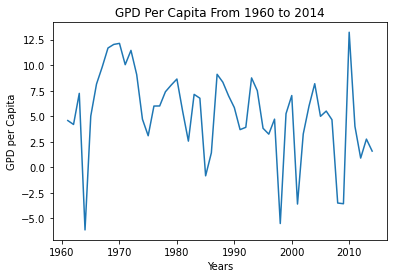

In [33]:
# Use line plot to measure the GDP
plt.plot(singapore_gdp["Year"].values, singapore_gdp["Value"].values)

plt.title('GPD Per Capita From 1960 to 2014')
plt.rcParams["figure.figsize"] = (7.5,5)

plt.ylabel('GPD per Capita')
plt.xlabel('Years')

plt.show()

There is no steady progress line and in the latest years it has been declined in GDP per Capita

In [34]:
#plot the value at 1960 and the value at 2014
values = singapore_gdp.iloc[[0, -1]]

In [35]:
values.head()

,CountryName,CountryCode,IndicatorName,Year,Value
1003,Singapore,SGP,GDP per capita growth (annual %),1961,4.580466
1056,Singapore,SGP,GDP per capita growth (annual %),2014,1.591855


Text(0.5, 0, 'Years')

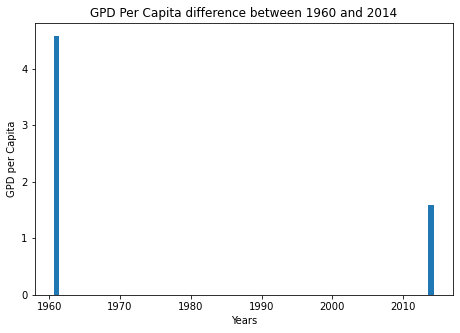

In [75]:
# bar plot
plt.bar(values.Year, values.Value)

plt.title('GPD Per Capita difference between 1960 and 2014')

plt.ylabel('GPD per Capita')
plt.xlabel('Years')

Here also i see that the value of GDP t the start of our analysis period is higher than the last one

In [37]:
# I will compare the value at 2014 to the mean value of GDP 
x = [1, "mean", "2014"]
y = [singapore_gdp["Value"].mean(), singapore_gdp[singapore_gdp["Year"] == 2014]["Value"].values[0]]
df = pd.DataFrame(data = y, columns = ["Value"], index = ["2014", "Mean"])

In [38]:
df.head()

,Value
2014,5.239174
Mean,1.591855


Text(0, 0.5, 'Value')

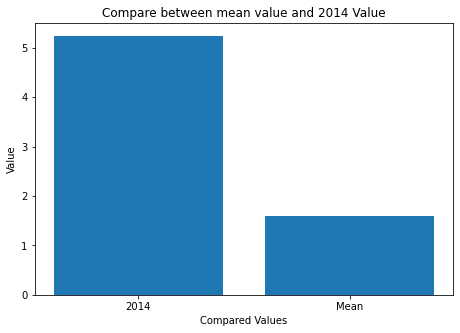

In [39]:
# plot the two values
x = ["Meab Value", "2014 Value"]
plt.bar(df.index, df["Value"].values);

plt.title("Compare between mean value and 2014 Value")
plt.xlabel("Compared Values")
plt.ylabel("Value")

I notice compare to the mean the value at 2014 after the decline it still good comparing to the mean value, the value at 1960 was before independence

##### Q2: How singapore Compare on the GDP at 2014 between Region countries ?

In [40]:
gdp_compare = gdp[gdp["Year"] == 2014]

In [41]:
gdp_compare.head()

,CountryName,CountryCode,IndicatorName,Year,Value
53,Australia,AUS,GDP per capita growth (annual %),2014,0.907780
93,Brunei Darussalam,BRN,GDP per capita growth (annual %),2014,-3.719286
114,Cambodia,KHM,GDP per capita growth (annual %),2014,5.328192
168,China,CHN,GDP per capita growth (annual %),2014,6.726721
222,Fiji,FJI,GDP per capita growth (annual %),2014,6.225178


In [57]:
gdp_compare = gdp_compare.sort_values(by = "Value")

In [58]:
# define a function to create the horizontal bar plot
def h_bar_plot(df, title, xlabel, ylabel):
    plt.barh(df.CountryName.values, df.Value.values)

    plt.title('{}'.format(title))

    plt.ylabel('{}'.format(ylabel))
    plt.xlabel('{}'.format(xlabel))
    
    return plt.show()

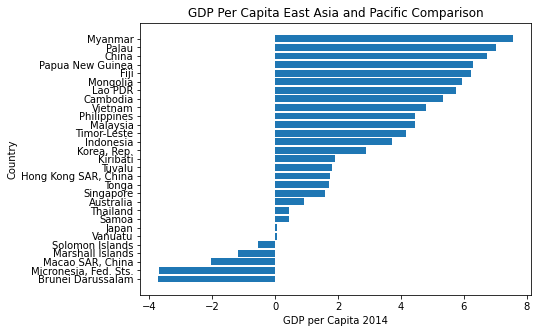

In [60]:
h_bar_plot(gdp_compare, "GDP Per Capita East Asia and Pacific Comparison", "GDP per Capita 2014", "Country")
plt.rcParams["figure.figsize"] = (15,20)


#### singapore in the 8th Place 

### 2- How health Devloped over the years in Singapore ?

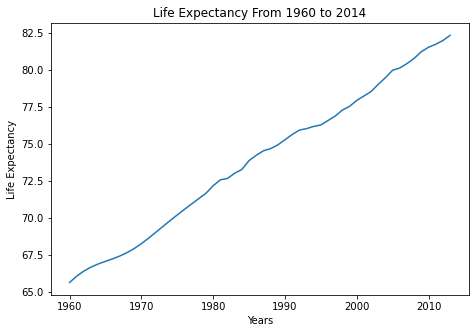

In [62]:
# Use line plot to analyize the Life Expectancy
plt.plot(singapore_health["Year"].values, singapore_health["Value"].values)

plt.title('Life Expectancy From 1960 to 2014')
plt.rcParams["figure.figsize"] = (7.5,5)

plt.ylabel('Life Expectancy')
plt.xlabel('Years')

plt.show()

The health of the population has steady increase trend line which means it has developed through the last 60 years

In [45]:
# Compare it with the Region Countries at 2013
health_compare = health[health["Year"] == 2013]

health_compare.head()

,CountryName,CountryCode,IndicatorName,Year,Value
53,Australia,AUS,"Life expectancy at birth, total (years)",2013,82.197561
107,Brunei Darussalam,BRN,"Life expectancy at birth, total (years)",2013,78.546659
161,Cambodia,KHM,"Life expectancy at birth, total (years)",2013,67.772049
215,China,CHN,"Life expectancy at birth, total (years)",2013,75.353024
269,"Korea, Dem. Rep.",PRK,"Life expectancy at birth, total (years)",2013,69.791951


In [63]:
health_compare = health_compare.sort_values(by = "Value")

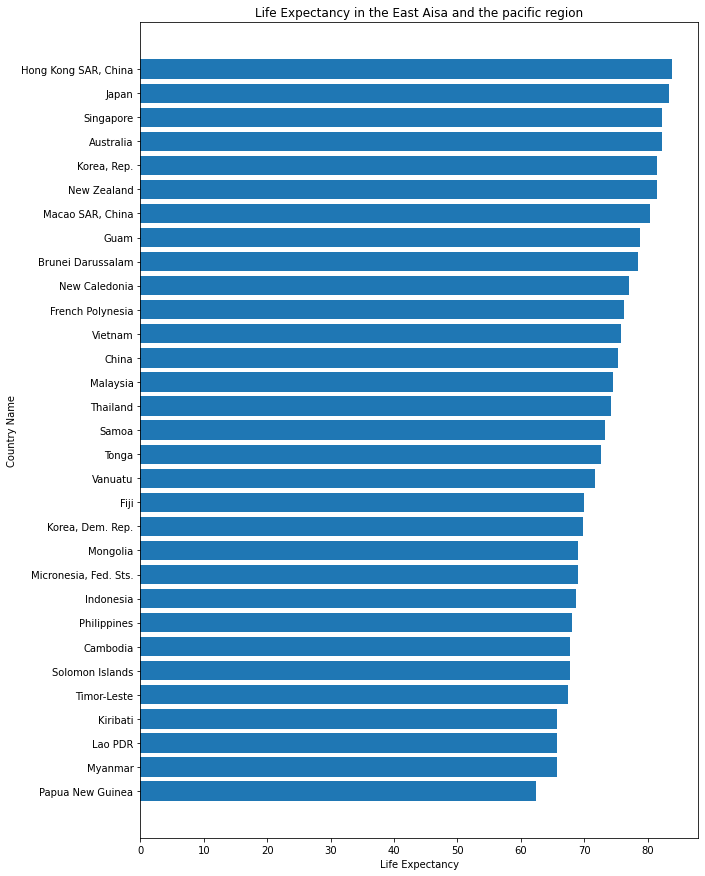

In [68]:
h_bar_plot(health_compare, "Life Expectancy in the East Aisa and the pacific region", "Life Expectancy", "Country Name")
plt.rcParams["figure.figsize"] = (10,15)


Singapore has the 6th place between region countries

### 3- How Unemployment Developed over the years in singapore ?

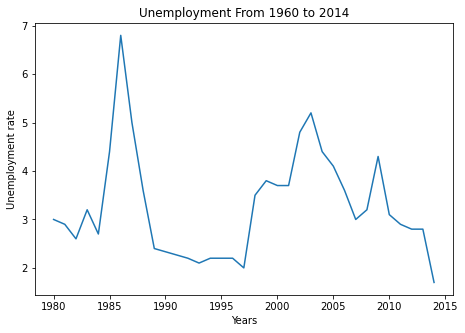

In [73]:
# Use line plot to measure the GDP
plt.plot(singapore_unemployment["Year"].values, singapore_unemployment["Value"].values)

plt.title('Unemployment From 1960 to 2014')

plt.ylabel('Unemployment rate')
plt.xlabel('Years')

plt.show()

plt.rcParams["figure.figsize"] = (7.5,5)


Unemployment Rate has a huge decline in the 80s and 90s, it seems that was a problem faced singapore in 2000s but it seems that the government controlled the situations and now the has very low unemployment rate

In [55]:
unemployment_compare = unemployment[unemployment["Year"] == 2014].sort_values(by = "Value")

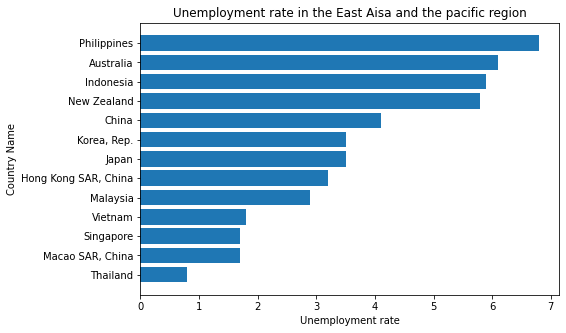

In [56]:
# compare unemployment rate between region countries
h_bar_plot(unemployment_compare, "Unemployment rate in the East Aisa and the pacific region", "Unemployment rate", "Country Name")
plt.rcParams["figure.figsize"] = (7.5,5)


Singapore has the 3th place between region countries, It has one of the most low unemployment rates in the region

<a id='conclusions'></a>
## Conclusions

> ### Result
> I started my analysis to explore the development process of singapore and compare it between its region countries and as i see it is one of the most developed countries in the last few decades and has a good position between its region countries

> Economy progress i measured it using GDP the deveopment was not steady as i expected but comparing the last year progress to the mean value it is progressing

> In the health sector steady increasing trend line 

> in the unemployment huge development as it now has one of the region lowest unemployment rate

> ### Limitations

> <li>No data about historical events in the countries which may have huge impact on its progress
> <li>The difference between recorded data years range